<a href="https://colab.research.google.com/github/andrewputrahartanto/Capstone_Data/blob/main/Notebook/Coba_Model_Hybrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hybrid Recommender System

In [13]:
import pandas as pd
places = pd.read_csv('https://raw.githubusercontent.com/andrewputrahartanto/Capstone_Data/main/Dataset/Dataset_Places.csv')
ratings = pd.read_csv('https://raw.githubusercontent.com/andrewputrahartanto/Capstone_Data/main/Dataset/Dataset_Rating.csv')

## Model Development with Content-based

### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(places['Category'])

tf.get_feature_names_out()

array(['agrowisata', 'alam', 'belanja', 'budaya', 'cagar', 'pantai',
       'rekreasi', 'religius'], dtype=object)

In [15]:
tfidf_matrix = tf.fit_transform(places['Category'])
tfidf_matrix.shape

(75, 8)

In [16]:
tfidf_matrix.todense()

matrix([[1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.52676093, 0.        , 0.        , 0.85001348,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 1.        , 0.        ,
         0.

In [17]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=places.Place_Name
).sample(10, axis=0)

,agrowisata,alam,belanja,budaya,cagar,pantai,rekreasi,religius
Place_Name,,,,,,,,
Pura Luhur Batukaru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Pura Saraswati,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Istana Air Taman Ujung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Pura Tanah Lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pantai Padang Padang,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pantai Pasir Putih,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Tari Barong dan Keris\r\n,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Pantai Blue Lagoon,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Wisata Agro Teba Sari Bali,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similarity

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 1., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 1.]])

In [19]:
cosine_sim_df = pd.DataFrame(
    cosine_sim, index=places.Place_Name, columns=places.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (75, 75)


Place_Name,Agrowisata Satria,Agung Bali,Wisata Air Panas Toya Bungkah,Air Terjun Aling-Aling,Air Terjun Tegenungan,Air Terjun Tukad Cepung,Aloha Ubud Swing,Bali Bird Park,Handara Iconic Gate,Bali Swing,...,Pura Uluwatu,Pusat Kesenian Ukir Desa Mas,Watersport Tanjung Benoa Bali,Tari Barong dan Keris\r\n,Kecak and Fire Dance,Teras Sawah Tegalalang,Tirta Gangga,Waterbom Bali,Alas Harum Agro Tourism,Wisata Agro Teba Sari Bali
Place_Name,,,,,,,,,,,,,,,,,,,,,
Wisata Agro Teba Sari Bali,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
Goa Gajah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Desa Wisata Penglipuran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
Danau Beratan,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.526761,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wisata Air Panas Toya Bungkah,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.526761,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pantai Seminyak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pusat Kesenian Ukir Desa Mas,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pantai Pasir Putih,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pantai Melasti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Recommendation Testing

In [20]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=places[['Place_Name', 'Category']], k=5):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [21]:
place_name = 'Pantai Canggu'
places[places.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Description,Weekend Holiday Price,Weekday Price,Category,City,Rating,Alamat,Coordinate,Lat,Long,Gambar
38,39,Pantai Canggu,Keunikan Pantai Canggu adalah hamparan sawah d...,0,0,Pantai,Badung,4.0,"Desa Canggu, Kecamatan Kuta Utara, Kabupaten B...","-8.660786688817117, 115.13213191019071",-8.660787,115.132132,V


In [22]:
place_recommendations(place_name)

,Place_Name,Category
0,Pantai Blue Lagoon,Pantai
1,Pantai Nusa Dua,Pantai
2,Pantai Melasti,Pantai
3,Pantai Padang Padang,Pantai
4,Pantai Seminyak,Pantai


In [23]:
place_name2 = 'Krisna Oleh Oleh'
places[places.Place_Name.eq(place_name2)]

,Place_Id,Place_Name,Description,Weekend Holiday Price,Weekday Price,Category,City,Rating,Alamat,Coordinate,Lat,Long,Gambar
31,32,Krisna Oleh Oleh,Toko yang menawarkan berbagai produk ciri khas...,0,0,Belanja,Buleleng,4.0,"Jl. Seririt- Singaraja, Temukus, Kec. Banjar, ...","-8.172140540308968, 114.9922848729617",-8.172141,114.992285,V


In [24]:
place_recommendations(place_name2)

,Place_Name,Category
0,Pasar Seni Tradisional Ubud,Belanja
1,Galeri Seni Semar Kuning,Belanja
2,Pusat Kesenian Ukir Desa Mas,Belanja
3,Pabrik Kata-Kata Joger,Belanja
4,Agung Bali,Belanja


## Model Development with Collaborative Filtering

### Data Preparation

In [25]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [26]:
user_ids = ratings['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
encoded User_Id :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73,

In [27]:
place_ids = ratings['Place_Id'].unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

In [28]:
ratings['user'] = ratings['User_Id'].map(user_to_user_encoded)
ratings['place'] = ratings['Place_Id'].map(place_to_place_encoded)

In [29]:
users_count = len(user_to_user_encoded)
place_count = len(place_encoded_to_place)

ratings['rating'] = ratings['Place_Rating'].values.astype(np.float32)

min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

print(f'Users Count: {users_count}')
print(f'Places Count: {place_count}')
print(f'Min rating: {min_rating}')
print(f'Max rating: {max_rating}')

Users Count: 100
Places Count: 75
Min rating: 1.0
Max rating: 5.0


### Split Training Data dan Validation Data

In [30]:
ratings = ratings.sample(frac=1, random_state=42)
ratings

,User_Id,Place_Id,Nama Tempat,Place_Rating,user,place,rating
1801,61,6,Air Terjun Tukad Cepung,5,60,32,5.0
1190,40,55,Pantai Waterblow,4,39,40,4.0
1817,61,41,Pantai Diamond,5,60,16,5.0
251,9,33,Sacred Monkey Forest Sanctuary,5,8,9,5.0
2505,84,37,Pantai Atuh,5,83,12,5.0
...,...,...,...,...,...,...,...
1638,55,45,Pantai Kuta,1,54,18,1.0
1095,37,49,Pantai Pandawa,3,36,22,3.0
1130,38,51,White Sand Beach,4,37,24,4.0
1294,44,13,Wanagiri Hidden Hills,4,43,4,4.0


In [31]:
x = ratings[['user', 'place']].values
y = ratings['rating'].apply(lambda x: (
    x - min_rating) / (max_rating - min_rating)).values

train_indices = int(0.8 * ratings.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[60 32]
 [39 40]
 [60 16]
 ...
 [37 24]
 [43  4]
 [28 62]] [1.   0.75 1.   ... 0.75 0.75 1.  ]


### Model Development

In [32]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, users_count, place_count, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.users_count = users_count
    self.place_count = place_count
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        users_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.user_bias = layers.Embedding(users_count, 1)
    self.place_embedding = layers.Embedding(
        place_count,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-8)
    )
    self.place_bias = layers.Embedding(place_count, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x)

In [33]:
model = RecommenderNet(users_count, place_count, 50)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [34]:
from keras.callbacks import  EarlyStopping

callbacks = EarlyStopping(
    min_delta=0.0001,
    patience=5,
    restore_best_weights=True,
)

In [35]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[callbacks]
)

Epoch 1/100
300/300 [==============================] - 6s 8ms/step - loss: 0.7103 - root_mean_squared_error: 0.3933 - val_loss: 0.6993 - val_root_mean_squared_error: 0.3878
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.7058 - root_mean_squared_error: 0.3906 - val_loss: 0.6961 - val_root_mean_squared_error: 0.3858
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6883 - root_mean_squared_error: 0.3794 - val_loss: 0.6930 - val_root_mean_squared_error: 0.3839
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6747 - root_mean_squared_error: 0.3709 - val_loss: 0.6900 - val_root_mean_squared_error: 0.3821
Epoch 5/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6631 - root_mean_squared_error: 0.3633 - val_loss: 0.6872 - val_root_mean_squared_error: 0.3804
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.6555 - root_mean_squared_error: 0.3583 - val_loss: 0.6841 

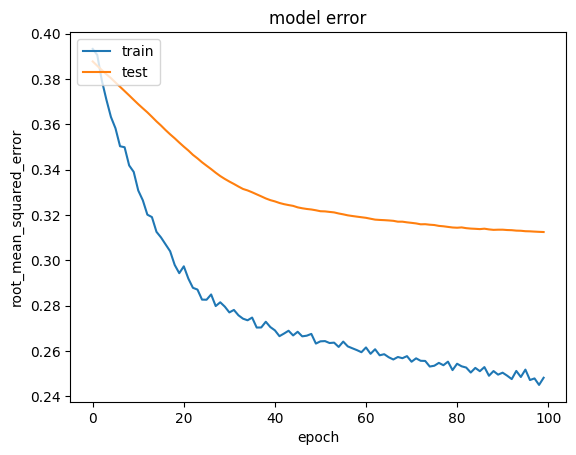

In [36]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model error')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

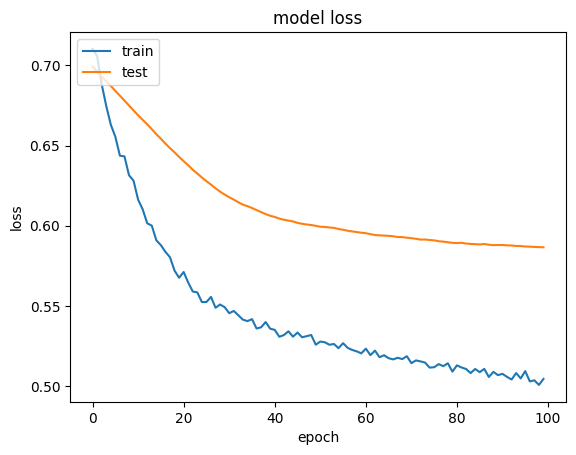

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Recommendation Testing

In [38]:
place_df = places
ratings_df = ratings

In [39]:
user_id = ratings_df.User_Id.sample(1).iloc[0]
place_rated = ratings_df[ratings_df.User_Id == user_id]

place_not_rated = place_df[~place_df['Place_Id'].isin(
    place_rated.Place_Id.values)]['Place_Id']
place_not_rated = list(
    set(place_not_rated).intersection(set(place_to_place_encoded.keys()))
)

place_not_rated = [
    [place_to_place_encoded.get(x)] for x in place_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_rated), place_not_rated)
)

In [40]:
# user_id
user_place_array
# place_rated
# place_not_rated
# user_encoder
# user_to_user_encoded

array([[10, 30],
       [10, 32],
       [10,  1],
       [10, 48],
       [10, 33],
       [10,  3],
       [10,  4],
       [10, 49],
       [10,  5],
       [10, 36],
       [10, 65],
       [10,  7],
       [10, 70],
       [10, 37],
       [10, 38],
       [10,  9],
       [10, 66],
       [10, 10],
       [10, 11],
       [10, 12],
       [10, 14],
       [10, 16],
       [10, 60],
       [10, 53],
       [10, 18],
       [10, 20],
       [10, 23],
       [10, 24],
       [10, 25],
       [10, 39],
       [10, 61],
       [10, 40],
       [10, 54],
       [10, 41],
       [10, 27],
       [10, 73],
       [10, 74],
       [10, 63],
       [10, 71],
       [10, 29],
       [10, 56],
       [10, 44],
       [10, 45],
       [10, 67],
       [10, 68]])

In [41]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_rated[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('=====' * 8)
print('Place with high ratings from user')
print('-----' * 8)

top_place_user = (
    place_rated.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['Place_Id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.Place_Name + ':', row.Category)

print('-----' * 8)
print('Top 10 place recommendation')
print('-----' * 8)

recommended_place = place_df[place_df['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name + ':', row.Category)

2/2 [==============================] - 0s 5ms/step
Showing recommendations for users: 11
Place with high ratings from user
----------------------------------------
Desa Budaya Kertalangu: Budaya
Galeri Seni Semar Kuning: Belanja
Pantai Crystal Bay : Pantai
Pantai Pandawa: Pantai
Pura Lempuyang: Religius
----------------------------------------
Top 10 place recommendation
----------------------------------------
Air Terjun Tukad Cepung: Alam
Aloha Ubud Swing : Agrowisata
Bali Swing: Rekreasi
Bukit Wanagiri: Alam
Gunung Agung: Alam
Gunung Batur: Alam
Jatiluwih Green Land: Agrowisata
Pantai Atuh: Pantai
Pantai Diamond: Pantai
Pantai Kelingking: Pantai
